In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from shapely.geometry import Point
import seaborn as sns
import geopandas as gp
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Usage of Current Relief Stands

In [3]:
usage = pd.read_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Hadoop_Processed_Data/usage_2015_July23.csv")
usage.date = pd.to_datetime(usage.date, dayfirst = True)
# usage.drop(['time_usage', 'time_usage_min'], axis=1, inplace=True)

In [4]:
len(usage.relief_stand_idx.unique())

60

In [5]:
usage.relief_stand_idx.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [6]:
usage.head(2)

,relief_stand_idx,date,car_usage,time_usage_hrs,Avg_hrs/car
0,0,2015-01-01,78,262.999167,3.371784
1,0,2015-01-02,101,226.645278,2.244013


# Relief stand geolocation

In [7]:
relief_stands = pd.read_csv("./New York City Taxi Relief Stations.csv")

In [8]:
for i in range(len(relief_stands)):
    relief_stands.loc[i,'lat'] = float(relief_stands.loc[i, 'Latitude, Longitude'].split(' ')[0])
    relief_stands.loc[i,'lng'] = float(relief_stands.loc[i, 'Latitude, Longitude'].split(' ')[1])

In [9]:
crs = {'init': 'epsg:4326', 'no_defs': True}
geometry = [Point(xy) for xy in zip(relief_stands['lng'], relief_stands['lat'])]
relief_stands = relief_stands.drop(["lng", "lat", 'Latitude, Longitude'], axis=1)
relief_stands = gp.GeoDataFrame(relief_stands, crs=crs, geometry=geometry)

In [10]:
relief_stands.reset_index(inplace=True)

In [11]:
relief_stands.drop([u'Stand Type'], axis=1, inplace=True)

In [12]:
relief_stands.columns = ['RS_ID', 'Location', 'geometry']

In [13]:
relief_stands.RS_ID = relief_stands.index

In [13]:
relief_stands.to_file("./relief_stands_23July.shp")
relief_stands.to_csv("./relief_stands_23July.csv")

In [14]:
type(relief_stands)

geopandas.geodataframe.GeoDataFrame

In [15]:
with open('relief_stands_23July.geojson', 'w') as f:
    f.write(relief_stands.to_json())
# relief_stands.to_file("./relief_stands_23July.geojson")

In [15]:
relief_stands.head()

,RS_ID,Location,geometry
0,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
1,1,Fourth Avenue between Third St and Sixth St,POINT (-73.98652069390001 40.6731545147)
2,2,North 6th Street between Berry St and Wythe St,POINT (-73.9602709752 40.7185812457)
3,3,Utica Avenue between Winthrop St and Rutland Blvd,POINT (-73.9311791758 40.6594997188)
4,4,Tenth Avenue between W 26th St and W 28th St,POINT (-74.0022979229 40.7502959021)


# Indexed relief stands is file /relief_stands_23July.csv

# Merge indexed relief stand data with relief stand geolocated data

In [16]:
usage.date.describe()

count                   16583
unique                    365
top       2015-05-22 00:00:00
freq                       53
first     2015-01-01 00:00:00
last      2015-12-31 00:00:00
Name: date, dtype: object

In [17]:
usage.head()

,relief_stand_idx,date,car_usage,time_usage_hrs,Avg_hrs/car
0,0,2015-01-01,78,262.999167,3.371784
1,0,2015-01-02,101,226.645278,2.244013
2,0,2015-01-03,69,238.721111,3.459726
3,0,2015-01-04,77,216.010556,2.805332
4,0,2015-01-05,84,169.230278,2.014646


In [18]:
usage_relief = pd.merge(usage, relief_stands, left_on='relief_stand_idx', right_on='RS_ID')

In [19]:
len(usage)

16583

In [20]:
len(usage_relief)

16583

In [21]:
usage_relief.head()

,relief_stand_idx,date,car_usage,time_usage_hrs,Avg_hrs/car,RS_ID,Location,geometry
0,0,2015-01-01,78,262.999167,3.371784,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
1,0,2015-01-02,101,226.645278,2.244013,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
2,0,2015-01-03,69,238.721111,3.459726,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
3,0,2015-01-04,77,216.010556,2.805332,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
4,0,2015-01-05,84,169.230278,2.014646,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)


In [103]:
usage_relief.to_csv('./usage_with_date_23July.csv')

# Statistics of Usage

In [32]:
usage_relief.groupby('date').agg({'car_usage':'sum',  'time_usage_hrs':'sum'}).mean()

time_usage_hrs    1166.629202
car_usage          549.561644
dtype: float64

In [37]:
usage_relief_means.car_usage.sum()

571.8013505758498

In [38]:
usage_relief_means[:10].car_usage.sum()

400.1372497365649

In [39]:
400/571.8

0.6995452955578875

In [40]:
usage_relief_means[:6].car_usage.sum()

336.1452054794521

In [41]:
336/549.5

0.6114649681528662

In [42]:
usage_relief.set_index('date').groupby(pd.TimeGrouper('W')).agg({'car_usage':'mean'})

,relief_stand_idx,date,car_usage,time_usage_hrs,Avg_hrs/car,RS_ID,Location,geometry
0,0,2015-01-01,78,262.999167,3.371784,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
1,0,2015-01-02,101,226.645278,2.244013,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
2,0,2015-01-03,69,238.721111,3.459726,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
3,0,2015-01-04,77,216.010556,2.805332,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
4,0,2015-01-05,84,169.230278,2.014646,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
5,0,2015-01-06,96,248.690278,2.590524,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
6,0,2015-01-07,88,167.647778,1.905088,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
7,0,2015-01-08,96,202.828611,2.112798,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
8,0,2015-01-09,86,260.494167,3.029002,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
9,0,2015-01-10,76,175.779444,2.312887,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)


In [23]:
usage_relief_median = usage_relief.groupby('relief_stand_idx').agg({'car_usage':'median','time_usage_hrs':'median', 'geometry':'first', 'Location':'first'})
usage_relief_median.reset_index(inplace=True)

In [25]:
usage_relief_median = usage_relief_median.sort_values(by='car_usage', ascending=False)

usage_relief_median.reset_index(inplace=True, drop=True)

In [27]:
usage_relief_means = usage_relief.groupby('relief_stand_idx').agg({'car_usage':'mean','time_usage_hrs':'mean', 'geometry':'first', 'Location':'first'})
usage_relief_means.reset_index(inplace=True)

In [28]:
usage_relief_means.head()

,relief_stand_idx,geometry,Location,time_usage_hrs,car_usage
0,0,POINT (-73.929918 40.812311),Park Avenue between E 135th St and E 138th St...,170.228819,76.764384
1,1,POINT (-73.98652069390001 40.6731545147),Fourth Avenue between Third St and Sixth St,74.487917,28.268493
2,2,POINT (-73.9602709752 40.7185812457),North 6th Street between Berry St and Wythe St,1.469766,1.202247
3,3,POINT (-73.9311791758 40.6594997188),Utica Avenue between Winthrop St and Rutland Blvd,1.642468,1.175258
4,4,POINT (-74.0022979229 40.7502959021),Tenth Avenue between W 26th St and W 28th St,10.076512,7.964187


In [29]:
usage_relief_means = usage_relief_means.sort_values(by='car_usage', ascending=False)
usage_relief_means.reset_index(inplace=True, drop=True)

In [30]:
for i in range(len(usage_relief_means)):
    usage_relief_means.loc[i,'lng'] = str(usage_relief_means.geometry[i]).replace('(', '').replace(')', '').split(' ')[1]
    usage_relief_means.loc[i,'lat'] = str(usage_relief_means.geometry[i]).replace('(', '').replace(')', '').split(' ')[2]

In [31]:
usage_relief_means.head()

,relief_stand_idx,geometry,Location,time_usage_hrs,car_usage,lng,lat
0,44,POINT (-73.9284084512 40.7467204482),36th St between Skillman Ave and 43rd Ave,274.369763,99.852055,-73.9284084512,40.7467204482
1,0,POINT (-73.929918 40.812311),Park Avenue between E 135th St and E 138th St...,170.228819,76.764384,-73.929918,40.812311
2,26,POINT (-73.9826412972 40.7424036887),Lexington Ave between E 28th St and E 27th St,77.613121,66.501370,-73.9826412972,40.7424036887
3,20,POINT (-73.983200633 40.7430167211),E 28th St between Park Ave S and Lexington Ave,40.508620,34.123288,-73.983200633,40.7430167211
4,38,POINT (-73.99590092450001 40.7615746731),W 44th St between Eleventh Ave and Tenth Ave,68.851008,30.635616,-73.99590092450001,40.7615746731


In [29]:
usage_relief_means.to_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Relief_stands_data/relief_stand_usage_means_23July.csv")

In [30]:
crs = {'init': 'epsg:4326', 'no_defs': True}
usage_relief_means = gp.GeoDataFrame(usage_relief_means, crs =crs)

In [31]:
usage_relief_means.crs

{'init': 'epsg:4326', 'no_defs': True}

In [32]:
hexagons = gp.read_file(".\Capstone - Taxi Relief Stand\Data_Warehouse\Hexagon_Shapefile_4003\hexagons_clipped.shp")
hexagons = hexagons.to_crs(epsg=4326)
hexagons.drop(['Id'], axis=1, inplace=True)
hexagons.crs

{'init': 'epsg:4326', 'no_defs': True}

In [33]:
relief_hexagon = gp.sjoin(hexagons,usage_relief_means)

In [34]:
relief_hexagon.head(2)

,GRID_ID,geometry,index_right,relief_stand_idx,Location,time_usage_hrs,car_usage,lng,lat
69,BF-38,POLYGON ((-73.98418964174329 40.75916442037367...,36,12,Broadway between W 48th St and W 47th St,2.599435,2.069930,-73.9848850666,40.7597864269
69,BF-38,POLYGON ((-73.98418964174329 40.75916442037367...,38,6,Eighth Avenue between W 46th St and W 47th St ...,4.129727,1.852518,-73.9876413089,40.7601329837


In [35]:
len(relief_hexagon)

60

In [36]:
relief_hexagon.drop(['index_right'], axis=1, inplace=True)

In [37]:
relief_hexagon.GRID_ID.unique()

array([u'BF-38', u'BB-52', u'BQ-62', u'BE-36', u'BB-47', u'BD-38',
       u'BR-26', u'BE-39', u'BN-40', u'BE-37', u'BK-48', u'BB-43',
       u'BD-42', u'BD-48', u'BO-41', u'BV-43', u'BE-38', u'BE-49',
       u'BD-43', u'BR-41', u'BC-44', u'BU-42', u'BV-42', u'BP-43',
       u'BL-35', u'BF-43', u'BF-40', u'BN-35', u'BC-40', u'BF-59',
       u'BR-42', u'BX-40', u'BG-37', u'BB-48', u'BM-35', u'BF-45',
       u'BF-44', u'BG-42', u'BG-43', u'BA-49', u'BD-36', u'BQ-41',
       u'BF-41', u'BE-43', u'BE-42', u'BF-42'], dtype=object)

In [38]:
relief_hexagon = relief_hexagon.sort_values('car_usage', ascending=False)
relief_hexagon.reset_index(inplace=True, drop=True)

In [39]:
relief_hexagon.to_csv("./relief_stands_with_gridid.csv")

### Top Used Relief Stands 

In [40]:
top_trs = relief_hexagon.loc[:9]

In [105]:
relief_hexagon.loc[:11]

,GRID_ID,geometry,relief_stand_idx,Location,time_usage_hrs,car_usage,lng,lat
0,BR-41,POLYGON ((-73.92561089492317 40.74871370297019...,44,36th St between Skillman Ave and 43rd Ave,274.369763,99.852055,-73.9284084512,40.7467204482
1,BR-26,POLYGON ((-73.92712801229941 40.80919559216895...,0,Park Avenue between E 135th St and E 138th St...,170.228819,76.764384,-73.929918,40.812311
2,BG-42,POLYGON ((-73.97944485982342 40.74039365532082...,26,Lexington Ave between E 28th St and E 27th St,77.613121,66.501370,-73.9826412972,40.7424036887
3,BG-42,POLYGON ((-73.97944485982342 40.74039365532082...,20,E 28th St between Park Ave S and Lexington Ave,40.508620,34.123288,-73.983200633,40.7430167211
4,BD-38,POLYGON ((-73.99369078885718 40.75916533252825...,38,W 44th St between Eleventh Ave and Tenth Ave,68.851008,30.635616,-73.99590092450001,40.7615746731
5,BF-59,POLYGON ((-73.98895439435282 40.67365673876675...,1,Fourth Avenue between Third St and Sixth St,74.487917,28.268493,-73.98652069390001,40.6731545147
6,BD-43,POLYGON ((-73.99369276370746 40.73830975620657...,34,W 21st St between Sixth Ave and Seventh Ave,82.728021,27.205479,-73.9951494156,40.7422345232
7,BF-43,POLYGON ((-73.98419459055367 40.73830884433479...,27,Lexington Ave between E 25th St and E 26th St,18.054627,14.019178,-73.9835073963,40.7411272158
8,BX-40,POLYGON ((-73.89710550131231 40.75286288273336...,49,64th St between 34th Ave and 35th Ave,41.798145,11.671233,-73.8988282241,40.7513249518
9,BG-43,"POLYGON ((-73.97786247479662 40.7383078012184,...",17,E23rd St between First Ave and Second Ave,17.879849,11.096154,-73.97966365880001,40.7374184059


## Least Used Relief Stands

In [42]:
bottom_trs = relief_hexagon.loc[50:]

In [43]:
relief_hexagon.loc[50:]

,GRID_ID,geometry,relief_stand_idx,Location,time_usage_hrs,car_usage,lng,lat
50,BQ-41,POLYGON ((-73.93194825880404 40.74454650426817...,54,Van Dam St between Queens Blvd and Skillman Ave,2.152127,1.290076,-73.9332505683,40.7456061491
51,BN-35,POLYGON ((-73.94617494584973 40.77166624838458...,24,E 86th St between Henderson Place and York Ave,1.800540,1.266187,-73.94615713970001,40.7755721721
52,BF-40,POLYGON ((-73.98419162163926 40.75082219750515...,9,Sixth Avenue between W 39th St and W 40th St,2.106654,1.218045,-73.9852168116,40.753280021
53,BK-48,POLYGON ((-73.96046277159091 40.71536193640826...,2,North 6th Street between Berry St and Wythe St,1.469766,1.202247,-73.9602709752,40.7185812457
54,BQ-62,POLYGON ((-73.93203761355002 40.65695254875806...,3,Utica Avenue between Winthrop St and Rutland Blvd,1.642468,1.175258,-73.9311791758,40.6594997188
55,BE-38,POLYGON ((-73.98894056088741 40.75707941944726...,37,W 41st St between Eighth Ave and Ninth Ave,2.210521,1.134615,-73.99166181130001,40.7572612863
56,BO-41,POLYGON ((-73.94144731936135 40.74455172512204...,47,45th Ave between 45th Ave Rdwy and 23rd St,4.265577,1.128205,-73.944729,40.746821
57,BM-35,POLYGON ((-73.95092794725863 40.76958281956595...,22,E 77th St between First Ave and Second Ave,2.248242,1.127273,-73.95479019370001,40.7715463493
58,BO-41,POLYGON ((-73.94144731936135 40.74455172512204...,51,Pearson St between Jackson Ave and Dead End,3.321132,1.120879,-73.94440899999999,40.745483
59,BP-43,(POLYGON ((-73.94118816680611 40.7402902170636...,50,Hunters Point Ave between 27th St and 30th St ...,1.850370,1.000000,-73.93973699999999,40.740636


# Collect data about characteristics

## Idle points , pickups and dropoffs

In [44]:
idle = pd.read_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Hadoop_Processed_Data/Hex_2015.csv")
idle.drop(['Unnamed: 0'], axis=1, inplace=True)

In [45]:
idle.head()

,GRID,date,idle_count,idle_time_count,pickup_count,dropoff_count
0,AT-69,150815,1.0,2393.0,0.0,0.0
1,AT-70,150101,1.0,2403.0,0.0,0.0
2,AT-70,150103,1.0,45271.0,0.0,0.0
3,AT-70,150308,1.0,3830.0,0.0,0.0
4,AT-70,150410,1.0,1800.0,0.0,0.0


In [46]:
idle.date = map(lambda x: dt.date(2015,int(str(idle.date[x])[2:4]),int(str(idle.date[x])[4:6])), idle.date)
idle.date = pd.to_datetime(idle.date)
idle.idle_time_count = idle.idle_time_count/60.0 
idle_grids = idle.groupby('GRID').agg({'idle_count':'mean','idle_time_count':'mean',
                                       'pickup_count':'mean', 'dropoff_count':'mean'})
idle_grids.reset_index(inplace=True)
idle_grids.head()

,GRID,idle_count,idle_time_count,pickup_count,dropoff_count
0,AT-53,0.000000,0.000000,0.500000,0.500000
1,AT-54,0.000000,0.000000,0.000000,1.000000
2,AT-69,0.038462,1.533974,0.230769,0.730769
3,AT-70,0.257812,61.077083,0.140625,0.867188
4,AT-71,0.073746,13.605949,0.123894,2.752212


In [47]:
hexagons = gp.read_file(".\Capstone - Taxi Relief Stand\Data_Warehouse\Hexagon_Shapefile_4003\hexagons_clipped.shp")
hexagons = hexagons.to_crs(epsg=4326)
hexagons.drop(['Id'], axis=1, inplace=True)
hexagons.crs

{'init': 'epsg:4326', 'no_defs': True}

In [48]:
hexagons.head()

,GRID_ID,geometry
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,..."
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ..."


In [49]:
nyc_grids = pd.merge(hexagons, idle_grids, left_on='GRID_ID', right_on='GRID', how='left').fillna(0)
nyc_grids.drop(['GRID'], axis = 1, inplace = True)

In [50]:
nyc_grids.head()

,GRID_ID,geometry,idle_count,idle_time_count,pickup_count,dropoff_count
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...,0.000000,0.000000,0.000000,0.000000
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,...",0.618750,209.358646,0.396875,1.431250
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...,0.000000,0.000000,0.000000,0.000000
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...,3.293151,1175.579635,0.150685,4.169863
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ...",1.890411,428.033836,1.320548,16.690411


# Violations

In [51]:
hexa_vio = pd.read_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Parking Tickets/violations_nyc_2015.csv")

In [52]:
hexa_vio.drop(['Unnamed: 0', 'Violation Code', 'geometry'], axis=1, inplace=True)

In [53]:
hexa_vio.head()

,Summons Number,Issue Date,GRID_ID
0,5084467648,2015-01-01,BH-57
1,5084489838,2015-01-03,BH-57
2,5084520651,2015-01-05,BH-57
3,5084522751,2015-01-05,BH-57
4,5084511868,2015-01-05,BH-57


In [54]:
hexa_vio['Issue Date'] = pd.to_datetime(hexa_vio['Issue Date'])

In [55]:
hexa_vio = hexa_vio.groupby('GRID_ID').agg({'Summons Number':'count'})
hexa_vio.reset_index(inplace=True)
hexa_vio.columns = ['GRID_ID', 'violations']
hexa_vio.head()

,GRID_ID,violations
0,AU-67,1
1,AU-68,1
2,AU-69,6
3,AU-73,1
4,AV-68,5


In [56]:
nyc_grids = pd.merge(nyc_grids, hexa_vio, on='GRID_ID', how='left').fillna(0)

In [57]:
nyc_grids.head()

,GRID_ID,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...,0.000000,0.000000,0.000000,0.000000,0.0
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,...",0.618750,209.358646,0.396875,1.431250,1.0
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...,0.000000,0.000000,0.000000,0.000000,0.0
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...,3.293151,1175.579635,0.150685,4.169863,0.0
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ...",1.890411,428.033836,1.320548,16.690411,1.0


## Parks

In [58]:
parks = pd.read_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Parks/grid_parks.csv")

In [59]:
parks.head(2)

,cartodb_id,the_geom,field_1,grid_id,id,count_vals,count_vals_density
0,7,0106000020E61000000100000001030000000100000007...,6,CK-57,0,3,0.000016
1,10,0106000020E61000000100000001030000000100000007...,9,CH-44,0,3,0.000016


In [60]:
parks.columns

Index([u'cartodb_id', u'the_geom', u'field_1', u'grid_id', u'id',
       u'count_vals', u'count_vals_density'],
      dtype='object')

In [61]:
parks.drop([u'cartodb_id', u'the_geom', u'field_1', u'id',
        u'count_vals_density'], axis=1, inplace = True)

In [62]:
parks.columns = ['GRID_ID', 'parks']

In [63]:
parks.head()

,GRID_ID,parks
0,CK-57,3
1,CH-44,3
2,BU-26,1
3,DE-41,1
4,BR-57,1


In [64]:
nyc_grids = pd.merge(nyc_grids, parks, on='GRID_ID', how='left').fillna(0)
nyc_grids.head()

,GRID_ID,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations,parks
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,...",0.618750,209.358646,0.396875,1.431250,1.0,0.0
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...,3.293151,1175.579635,0.150685,4.169863,0.0,0.0
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ...",1.890411,428.033836,1.320548,16.690411,1.0,0.0


## Restaurants

In [65]:
restaurants = pd.read_csv("./Capstone - Taxi Relief Stand/Data_Warehouse/Hexagon_Features_Restaurants/Hexagon_Feature.csv")

In [66]:
restaurants.head(2)

,Unnamed: 0,GRID_ID,Id,geometry,centers,lon,lat,restaurant_indian,restaurant_cheap,hotel,Bangladesh
0,0,BZ-45,1,POLYGON ((-73.88922678226746 40.72991440009238...,POINT (-73.89080619307887 40.73200147282016),-73.890806,40.732001,0,7,0,0
1,1,CC-66,2,POLYGON ((-73.87514935222191 40.64022017573761...,POINT (-73.87672619958167 40.64230746486044),-73.876726,40.642307,0,0,0,0


In [67]:
restaurants.columns

Index([u'Unnamed: 0', u'GRID_ID', u'Id', u'geometry', u'centers', u'lon',
       u'lat', u'restaurant_indian', u'restaurant_cheap', u'hotel',
       u'Bangladesh'],
      dtype='object')

In [68]:
restaurants.drop([u'Unnamed: 0', u'Id', u'geometry', u'centers', u'lon',
       u'lat'], axis=1, inplace = True)

In [69]:
restaurants.head()

,GRID_ID,restaurant_indian,restaurant_cheap,hotel,Bangladesh
0,BZ-45,0,7,0,0
1,CC-66,0,0,0,0
2,CF-32,0,0,0,0
3,BG-76,0,17,0,0
4,CP-44,0,4,0,0


In [70]:
restaurants.columns = [u'GRID_ID', u'rest_indian', u'rest_cheap',
       u'hotel', u'Bangladesh']

In [71]:
restaurants.head(2)

,GRID_ID,rest_indian,rest_cheap,hotel,Bangladesh
0,BZ-45,0,7,0,0
1,CC-66,0,0,0,0


In [72]:
nyc_grids = pd.merge(nyc_grids, restaurants, on='GRID_ID', how='left').fillna(0)
nyc_grids.head()

,GRID_ID,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations,parks,rest_indian,rest_cheap,hotel,Bangladesh
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,7,0,0
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,...",0.618750,209.358646,0.396875,1.431250,1.0,0.0,0,0,0,0
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...,3.293151,1175.579635,0.150685,4.169863,0.0,0.0,0,17,0,0
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ...",1.890411,428.033836,1.320548,16.690411,1.0,0.0,0,4,0,0


## No. of relief stands

### 60 relief stands

In [73]:
rs_count = relief_hexagon.groupby('GRID_ID').agg({'relief_stand_idx':'count'})
rs_count.reset_index(inplace = True)
rs_count.columns = ['GRID_ID', 'rs_count']

In [74]:
rs_count.head()

,GRID_ID,rs_count
0,BA-49,1
1,BB-43,1
2,BB-47,1
3,BB-48,1
4,BB-52,1


In [75]:
nyc_grids = pd.merge(nyc_grids, rs_count, on='GRID_ID', how='left').fillna(0)
nyc_grids.head()

,GRID_ID,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations,parks,rest_indian,rest_cheap,hotel,Bangladesh,rs_count
0,BZ-45,POLYGON ((-73.88922678226744 40.72991440009237...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,7,0,0,0.0
1,CC-66,"POLYGON ((-73.8751493522219 40.64022017573762,...",0.618750,209.358646,0.396875,1.431250,1.0,0.0,0,0,0,0,0.0
2,CF-32,POLYGON ((-73.85951521552445 40.78556019282625...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0.0
3,BG-76,POLYGON ((-73.97948851930843 40.59857430474219...,3.293151,1175.579635,0.150685,4.169863,0.0,0.0,0,17,0,0,0.0
4,CP-44,"POLYGON ((-73.8132394398212 40.7339873629611, ...",1.890411,428.033836,1.320548,16.690411,1.0,0.0,0,4,0,0,0.0


## Extract the final dataframe with all features for nyc

In [76]:
nyc_grids.to_file("./vish_final_hexagon_df.shp")

In [96]:
type(nyc_grids)

geopandas.geodataframe.GeoDataFrame

In [99]:
nyc_grids.to_file('./vish_final_hexagon_df.gpx', 'GPX')

ValueError: Null layer

In [77]:
nyc_grids.to_csv("./vish_final_hexagon_df.csv")

# Usage Statistics of 60 relief stands

In [78]:
usage_relief.head(2)

,relief_stand_idx,date,car_usage,time_usage_hrs,Avg_hrs/car,RS_ID,Location,geometry
0,0,2015-01-01,78,262.999167,3.371784,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)
1,0,2015-01-02,101,226.645278,2.244013,0,Park Avenue between E 135th St and E 138th St...,POINT (-73.929918 40.812311)


In [79]:
top_trs_usage = usage_relief[usage_relief.relief_stand_idx.isin(top_trs.relief_stand_idx)].set_index('date').groupby([pd.TimeGrouper('M')]).agg({'car_usage':'sum',
                                                                                      'time_usage_hrs':'sum'})

In [80]:
top_trs_usage.head()

,time_usage_hrs,car_usage
date,,
2015-01-31,27679.370000,12823
2015-02-28,24995.013334,11798
2015-03-31,26195.539722,12579
2015-04-30,25464.741111,12056
2015-05-31,26975.078889,12442


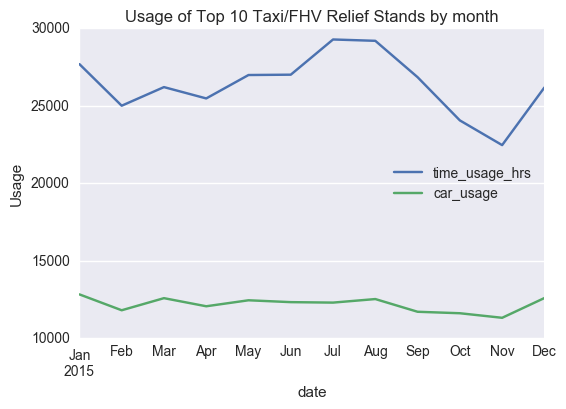

In [81]:
top_trs_usage.plot()
plt.title('Usage of Top 10 Taxi/FHV Relief Stands by month')
plt.ylabel('Usage')

In [82]:
garage = [44, 0, 38, 1, 34, 49]
top = [26, 20, 27, 17]
top_trs_garage_usage = usage_relief[usage_relief.relief_stand_idx.isin(garage)]
top_trs_nongarage_usage = usage_relief[usage_relief.relief_stand_idx.isin(top)]
top_trs_nongarage_usage = top_trs_nongarage_usage.set_index('date').groupby(pd.TimeGrouper('M')).agg({'car_usage':'sum', 
                                                                                                'time_usage_hrs':'sum'})
top_trs_garage_usage = top_trs_garage_usage.set_index('date').groupby(pd.TimeGrouper('M')).agg({'car_usage':'sum', 
                                                                                                'time_usage_hrs':'sum'})

In [83]:
top_trs_garage_usage.head()

,time_usage_hrs,car_usage
date,,
2015-01-31,22453.798056,8379
2015-02-28,20347.570001,7888
2015-03-31,21123.726666,8511
2015-04-30,20397.836111,8106
2015-05-31,22217.012500,8687


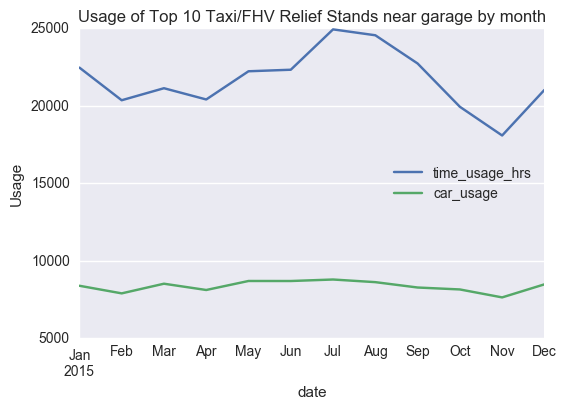

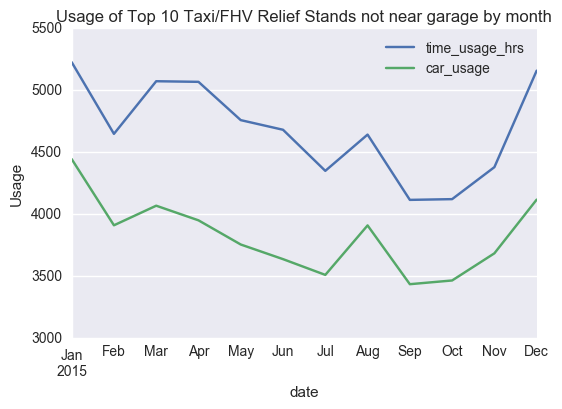

In [84]:
top_trs_garage_usage.plot()
plt.title('Usage of Top 10 Taxi/FHV Relief Stands near garage by month')
plt.ylabel('Usage')

top_trs_nongarage_usage.plot()
plt.title('Usage of Top 10 Taxi/FHV Relief Stands not near garage by month')
plt.ylabel('Usage')

In [85]:
top_hexagons = nyc_grids[nyc_grids.GRID_ID.isin(top_trs.GRID_ID)]
top_hexagons = top_hexagons.set_index('GRID_ID')

In [86]:
top_hexagons.head(2)

,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations,parks,rest_indian,rest_cheap,hotel,Bangladesh,rs_count
GRID_ID,,,,,,,,,,,,
BD-38,POLYGON ((-73.99369078885718 40.75916533252825...,264.106849,39771.855753,1898.265753,1787.104110,1604.0,0.0,1,50,31,0,2.0
BR-26,POLYGON ((-73.92712801229941 40.80919559216895...,336.361644,50631.320822,83.756164,73.810959,26.0,0.0,0,19,1,0,1.0


In [87]:
bottom_hexagons = nyc_grids[nyc_grids.GRID_ID.isin(bottom_trs.GRID_ID)]
bottom_hexagons = bottom_hexagons.set_index('GRID_ID')

In [88]:
bottom_hexagons.head(2)

,geometry,idle_count,idle_time_count,pickup_count,dropoff_count,violations,parks,rest_indian,rest_cheap,hotel,Bangladesh,rs_count
GRID_ID,,,,,,,,,,,,
BQ-62,POLYGON ((-73.93203761355002 40.65695254875806...,3.391781,792.526438,2.758904,11.980822,0.0,0.0,1,8,1,0,1.0
BK-48,POLYGON ((-73.96046277159091 40.71536193640826...,3.197260,263.738447,498.852055,456.769863,1.0,0.0,0,13,9,0,1.0


{'boxes': [<matplotlib.lines.Line2D at 0x18b582b0>],
 'caps': [<matplotlib.lines.Line2D at 0x18b58eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b65f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18b659e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18b583c8>,
  <matplotlib.lines.Line2D at 0x18b58940>]}

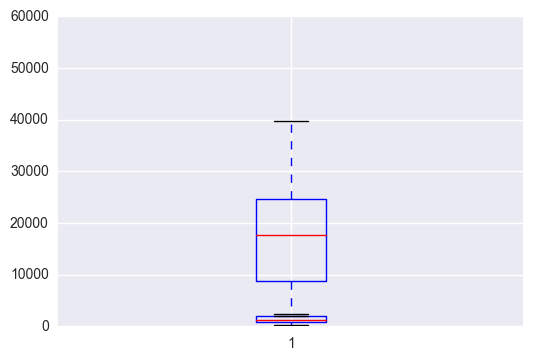

In [95]:
plt.boxplot(top_hexagons.idle_time_count)
plt.boxplot(bottom_hexagons.idle_time_count)